In [1]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from IPython.display import display, clear_output

m_store = pd.read_csv('C:/Users/manci/Desktop/data/PythonML-main/PythonML-main/chapter03/m_store.csv')
m_area = pd.read_csv('C:/Users/manci/Desktop/data/PythonML-main/PythonML-main/chapter03/m_area.csv')
order_data = pd.read_csv('C:/Users/manci/Desktop/data/PythonML-main/PythonML-main/chapter03/tbl_order_202104.csv')

In [3]:
order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2


In [4]:
m_store.head()

,store_id,store_name,area_cd
0,1,삼일대로점,SL
1,2,세종대로점,SL
2,3,무교로점,SL
3,4,덕수궁길점,SL
4,5,서소문로점,SL


In [5]:
order_data = pd.merge(order_data, m_store, on = 'store_id', how = 'left')
order_data = pd.merge(order_data, m_area, on = 'area_cd', how = 'left')

In [6]:
order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB,경기,경기북부
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주


In [7]:
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'delivery'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'takeout'

order_data.loc[order_data['status'] == 0, 'status_name'] = '주문 접수'
order_data.loc[order_data['status'] == 1, 'status_name'] = '결제 완료'
order_data.loc[order_data['status'] == 2, 'status_name'] = '배달 완료'
order_data.loc[order_data['status'] == 9, 'status_name'] = '주문 취소'

order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,결제 완료
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB,경기,경기북부,delivery,주문 취소
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료


In [8]:
from ipywidgets import Dropdown

def order_by_store(val):
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & 
                               (order_data['status'].isin([1,2]))]
    display(pick_data.head())
    
store_list = m_store['store_name'].tolist()

In [9]:
dropdown = Dropdown(options = store_list, description = '지역 선택:')
dropdown.observe(order_by_store, names = 'value')
display(dropdown)

Dropdown(description='지역 선택:', index=7, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', …

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
1241,25963192,8,C97419787,99,58788062,2021-04-01 12:43,2021-04-01 13:53,0,47440,2,당산로점,SL,서울,서울,delivery,배달 완료
1645,86022388,8,C24876570,22,77170238,2021-04-01 13:19,2021-04-01 14:38,1,21120,1,당산로점,SL,서울,서울,takeout,결제 완료
1723,79461357,8,C31560097,44,34736500,2021-04-01 13:26,2021-04-01 13:42,1,23080,1,당산로점,SL,서울,서울,takeout,결제 완료
1810,42968878,8,C21408354,92,53628663,2021-04-01 13:34,2021-04-01 13:55,0,35820,2,당산로점,SL,서울,서울,delivery,배달 완료
1920,46275602,8,C84096691,81,72009349,2021-04-01 13:43,2021-04-01 14:48,0,29870,2,당산로점,SL,서울,서울,delivery,배달 완료


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

import os

if os.name == 'nt':  #window
    plt.rc('font', family = 'Malgun Gothic')
elif os.name == 'posix': #mac
    plt.rc('font', family = 'AllieGothic')

plt.rc('axes', unicode_minus = False)

Dropdown(index=16, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환로점', '성내…

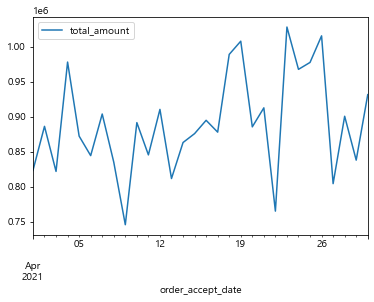

In [11]:
def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & 
                               (order_data['status'].isin([1,2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace = True)
    temp.resample('D').sum().plot()
    
dropdown2 = Dropdown(options = store_list)
dropdown2.observe(graph_by_store, names = 'value')
display(dropdown2)

In [12]:
from ipywidgets import SelectMultiple

def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new'])) & 
                               (order_data['status'].isin([1,2]))]
    display(pick_data.head())
    
select = SelectMultiple(options = store_list)
select.observe(order_by_multi, names = 'value')
display(select)

SelectMultiple(index=(3,), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
316,75209408,4,C83052374,13,29558184,2021-04-01 11:24,2021-04-01 12:12,0,24710,2,덕수궁길점,SL,서울,서울,delivery,배달 완료,2021-04-01
369,4329119,4,C22457156,27,35295796,2021-04-01 11:27,2021-04-01 11:56,0,29870,2,덕수궁길점,SL,서울,서울,delivery,배달 완료,2021-04-01
730,82419352,4,C16081799,54,95234213,2021-04-01 11:57,2021-04-01 12:38,0,32340,2,덕수궁길점,SL,서울,서울,delivery,배달 완료,2021-04-01
908,98656061,4,C85288501,8,27120916,2021-04-01 12:14,2021-04-01 13:00,1,21120,1,덕수궁길점,SL,서울,서울,takeout,결제 완료,2021-04-01
1113,54302915,4,C93030586,25,7159120,2021-04-01 12:32,2021-04-01 12:47,0,26770,2,덕수궁길점,SL,서울,서울,delivery,배달 완료,2021-04-01


In [13]:
def graph_by_multi(val):
    clear_output()
    display(select2)
    
    fig = plt.figure(figsize = (17,4))
    plt.subplots_adjust(wspace = 0.25, hspace = 0.6)
    
    i = 0
    for trg in val['new']:
        pick_data = order_data[
            (order_data['store_name'] == trg) &
            (order_data['status'].isin([1,2]))]
        temp = pick_data[['order_accept_date',
                          'total_amount', 'store_name']].copy()
        temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace = True)
        i += 1
        ax = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum())
        ax.set_title(trg)

In [14]:
select2 = SelectMultiple(options = store_list, description = '매장 선택:')
select2.observe(graph_by_multi, names = 'value')
display(select2)

SelectMultiple(description='매장 선택:', options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산…

In [15]:
from ipywidgets import IntSlider

def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() < val['new']])
    
slider = IntSlider(value = 1100, min = 1000, max = 2000, step = 100, description = '건수:',)
slider.observe(store_lower, names = 'value')
display(slider)

IntSlider(value=1400, description='건수:', max=2000, min=1000, step=100)

store_name
가덕해안로점    1008
가마산로점     1036
감천항로점     1000
강남대로2점    1090
강남대로점     1068
          ... 
화곡로2점     1175
화곡로점      1059
화중로점      1144
효덕로점      1290
효원로점       795
Length: 162, dtype: int64


In [16]:
def store_upper(val):
    clear_output()
    display(slider2)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() >= val['new']])

In [17]:
slider2 = IntSlider(value = 1600, min = 1000, max = 2000, step = 100,
                    description = '건수:',)
slider2.observe(store_upper, names = 'value')
display(slider2)

IntSlider(value=1400, description='건수:', max=2000, min=1000, step=100)

store_name
가마산로2점     1468
관악로2점      1415
관저동로점      1435
기장대로점      1437
낙동대로2점     1436
남부순환로2점    1502
노해로2점      1613
녹사평대로2점    1535
다대동로점      1408
대둔산로점      1439
대종로점       1465
마들로점       1438
목공동로2점     1439
무교로2점      1536
배재로점       1475
법원로점       2230
분포로점       1499
비아로점       1503
사우중로점      1583
사직로점       2263
서하로점       1501
성남대로점      1490
송정해변로점     1534
온천천로점      1528
절영로점       1441
종로2점       1501
중구로점       1443
중앙대로점      2179
창경궁로2점     1405
천호대로2점     1524
하신번영로점     1477
학동로2점      1404
dtype: int64


In [18]:
from ipywidgets import ToggleButtons

area_list = m_area['wide_area'].unique()

def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = order_data.loc[
        (order_data['wide_area'] == val['new']) & 
        (order_data['status'].isin([1,2]))]
    display(pick_data.head())

In [19]:
toggle = ToggleButtons(options = area_list)
toggle.observe(order_by_area, names = 'value')
display(toggle)

ToggleButtons(index=1, options=('서울', '부산', '대전', '광주', '세종', '경기'), value='부산')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료,2021-04-01
14,33095269,113,C14475051,67,34036936,2021-04-01 11:01,2021-04-01 11:52,0,23160,2,달맞이길점,BS,부산,부산,delivery,배달 완료,2021-04-01
35,59476456,96,C54836002,66,90620694,2021-04-01 11:02,2021-04-01 11:34,0,22520,2,구덕로점,BS,부산,부산,delivery,배달 완료,2021-04-01
37,71121881,120,C75817216,45,7610409,2021-04-01 11:02,2021-04-01 11:15,1,41330,1,청사포로점,BS,부산,부산,takeout,결제 완료,2021-04-01
38,80022601,109,C78128748,92,780491,2021-04-01 11:02,2021-04-01 11:15,1,35300,1,명지국제7로점,BS,부산,부산,takeout,결제 완료,2021-04-01


In [20]:
def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[
        (order_data['wide_area'] == val['new']) & 
        (order_data['status'].isin([1,2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace = True)
    temp.resample('D').sum().plot()

ToggleButtons(index=5, options=('서울', '부산', '대전', '광주', '세종', '경기'), value='경기')

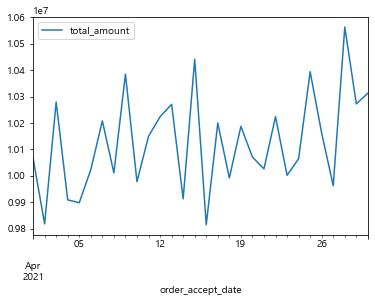

In [21]:
toggle2 = ToggleButtons(options = area_list)
toggle2.observe(graph_by_area, names = 'value')
display(toggle2)

In [22]:
from ipywidgets import DatePicker
import datetime

order_data.loc[:, 'order_date'] = pd.to_datetime(order_data['order_accept_date']).dt.date

In [23]:
def order_by_date(val):
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[(order_data['order_date'] == val['new']) & 
                               (order_data['status'].isin([1,2]))]
    print(len(pick_data))
    display(pick_data.head())

In [24]:
date_picker = DatePicker(value = datetime.datetime(2021, 4, 1))
date_picker.observe(order_by_date, names = 'value')
display(date_picker)

DatePicker(value=datetime.date(2021, 4, 21))

6398


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
155520,56381730,50,C12861035,6,66623762,2021-04-21 11:00,2021-04-21 11:25,0,22380,2,남부순환로2점,SL,서울,서울,delivery,배달 완료,2021-04-21
155521,23805973,22,C46437685,48,26485872,2021-04-21 11:00,2021-04-21 11:37,0,44620,2,녹사평대로점,SL,서울,서울,delivery,배달 완료,2021-04-21
155522,44320823,136,C51912636,97,94784523,2021-04-21 11:00,2021-04-21 11:51,0,28080,2,엑스포로점,DJ,대전,대전,delivery,배달 완료,2021-04-21
155523,10603093,123,C19848860,35,19256043,2021-04-21 11:00,2021-04-21 11:30,1,26030,1,송정해변로점,BS,부산,부산,takeout,결제 완료,2021-04-21
155524,29632696,12,C97204914,1,83263786,2021-04-21 11:00,2021-04-21 11:16,0,28270,2,봉화산로점,SL,서울,서울,delivery,배달 완료,2021-04-21


In [25]:
min_date = datetime.date(2021, 4, 1)
max_date = datetime.date(2021, 4, 30)

#기간 설정되면 호출
def order_between_date():
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[
        (order_data['order_date'] >= min_date) & 
        (order_data['order_date'] <= max_date) & 
        (order_data['status'].isin([1,2]))]
    print(len(pick_data))
    display(pick_data.head())

In [26]:
#가장 빠른 날짜 설정
def set_min_date(val):
    global min_date
    min_date = val['new']
    order_between_date()
    
#가장 늦은 날짜 설정
def set_max_date(val):
    global max_date
    max_date = val['new']
    order_between_date()

In [27]:
date_picker_min = DatePicker(value = min_date)
date_picker_min.observe(set_min_date, names = 'value')
print('기간 시작')
display(date_picker_min)
date_picker_max = DatePicker(value = max_date)
date_picker_max.observe(set_max_date, names = 'value')
print('기간 끝')
display(date_picker_max)

DatePicker(value=datetime.date(2021, 4, 1))

DatePicker(value=datetime.date(2021, 4, 13))

82410


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,결제 완료,2021-04-01
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료,2021-04-01
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료,2021-04-01
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료,2021-04-01
5,86102793,167,C06298599,21,70395221,2021-04-01 11:00,2021-04-01 11:59,1,37420,1,서하로점,GJ,광주,광주,takeout,결제 완료,2021-04-01
